In [34]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
df.shape

(4815, 9)

In [5]:
df.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [6]:
df.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [7]:
duplicatas = df.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 1280


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(3535, 9)

In [10]:
df = df.dropna()

In [11]:
df.shape

(3534, 9)

In [12]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [13]:
df.drop(['Land Area (Km²)', 'Density (P/Km²)', 'Population -2020'] , axis=1, inplace= True)

In [14]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria
3,01082688c6,happy bday!,positive,morning,46-60,Andorra
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola


In [15]:
df = df.rename(columns ={'textID' :'ID'})

In [16]:
df.head()

,ID,text,sentiment,Time of Tweet,Age of User,Country
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria
3,01082688c6,happy bday!,positive,morning,46-60,Andorra
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola


In [17]:
n_amostral = 200

In [18]:
contagem_sentimentos = df['sentiment'].value_counts()
print(contagem_sentimentos)

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [19]:
contagem = {
    'neutral': 1430,
    'positive': 1103,
    'negative': 1001,
}

In [20]:
counts_df = pd.DataFrame.from_dict(contagem, orient='index', columns=['count'])

In [21]:
counts_df['proportion'] = counts_df['count'] / counts_df['count'].sum()

In [22]:
counts_df['samples'] = (counts_df['proportion'] * n_amostral).round().astype(int)
print(counts_df)

          count  proportion  samples
neutral    1430    0.404641       81
positive   1103    0.312111       62
negative   1001    0.283248       57


In [23]:
df_amostral = []

In [24]:
for sentiment, row in counts_df.iterrows():
    # Amostrar as linhas 'samples' para cada nota
    n_samples = int(row['samples'])
    amostral = df[df['sentiment'] == sentiment].sample(n=n_samples, random_state=1)
    df_amostral.append(amostral)

In [25]:
df_amostral_final = pd.concat(df_amostral)

In [26]:
df_amostral_final = df_amostral_final.sample(frac=1, random_state=1).reset_index(drop=True)

In [27]:
df = df_amostral_final

In [28]:
df.shape

(200, 6)

In [29]:
duplicatas = df.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [30]:
df.head()

,ID,text,sentiment,Time of Tweet,Age of User,Country
0,43b390b336,I checked. We didn`t win,neutral,night,70-100,Bahamas
1,5eea04087b,"Sitting here, waiting to go to the gym.....alm...",neutral,noon,60-70,Oman
2,7a83b8c7e2,I feel sorry for my bestie good luck ali!,neutral,noon,60-70,Nepal
3,c9980ac0cd,airsoft is so much fun! i play with my brothe...,positive,noon,21-30,Kenya
4,d18a55e49e,alice doesn`t know what to wear to the cinema <3,negative,night,31-45,Uzbekistan


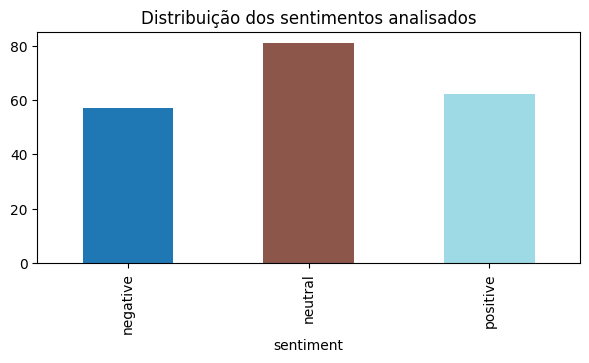

In [36]:
color=[plt.cm.tab20(i) for i in range(len(df['sentiment'].unique()))]

ax = df['sentiment'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos sentimentos',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df['sentiment'].nunique())])

ax.set_xlabel('sentiment')
plt.show()

In [39]:
count_sentimentos = df['sentiment'].value_counts().sort_index()
print(count_sentimentos)


sentiment
negative    57
neutral     81
positive    62
Name: count, dtype: int64


In [40]:
def clean(text):
    # Remover tags HTML (eu tinha visto uma lá em cima, mas nao sei se ela linha rodou quando eu redimensionei o dataset, anyway melhor prevenir do que remediar)
    text = re.sub(r'<.*?>', '', text)
    
    # Converter para minúsculas
    text = text.lower()
    
    # Remoção de espaços em branco extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['clean_text'] = df['text'].apply(clean)

In [41]:
df.head()

,ID,text,sentiment,Time of Tweet,Age of User,Country,clean_text
0,43b390b336,I checked. We didn`t win,neutral,night,70-100,Bahamas,i checked. we didn`t win
1,5eea04087b,"Sitting here, waiting to go to the gym.....alm...",neutral,noon,60-70,Oman,"sitting here, waiting to go to the gym.....alm..."
2,7a83b8c7e2,I feel sorry for my bestie good luck ali!,neutral,noon,60-70,Nepal,i feel sorry for my bestie good luck ali!
3,c9980ac0cd,airsoft is so much fun! i play with my brothe...,positive,noon,21-30,Kenya,airsoft is so much fun! i play with my brother...
4,d18a55e49e,alice doesn`t know what to wear to the cinema <3,negative,night,31-45,Uzbekistan,alice doesn`t know what to wear to the cinema <3


In [42]:
df.drop(['text'] , axis=1, inplace= True)

In [44]:
df = df.rename(columns ={'clean_text' :'text'})

In [45]:
df.head()

,ID,sentiment,Time of Tweet,Age of User,Country,text
0,43b390b336,neutral,night,70-100,Bahamas,i checked. we didn`t win
1,5eea04087b,neutral,noon,60-70,Oman,"sitting here, waiting to go to the gym.....alm..."
2,7a83b8c7e2,neutral,noon,60-70,Nepal,i feel sorry for my bestie good luck ali!
3,c9980ac0cd,positive,noon,21-30,Kenya,airsoft is so much fun! i play with my brother...
4,d18a55e49e,negative,night,31-45,Uzbekistan,alice doesn`t know what to wear to the cinema <3


In [46]:
def count_tokens(text):
    # Esta função divide o texto por espaços, uma aproximação simplista da tokenização.
    return len(text.split())

# Aplica a função de contagem de tokens na coluna 'text' e soma todos os tokens.
total_tokens = df['text'].apply(count_tokens).sum()

print("Total de tokens na coluna 'text':", total_tokens)


Total de tokens na coluna 'text': 2522


In [47]:
df.to_csv("Tweets Sentiment Analysis.csv")